In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O loan.csv https://raw.githubusercontent.com/studyfree20/data/main/loan.csv

--2020-10-31 17:47:36--  https://raw.githubusercontent.com/studyfree20/data/main/loan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22754 (22K) [text/plain]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  22.22K  --.-KB/s    in 0.002s  

2020-10-31 17:47:36 (12.1 MB/s) - ‘loan.csv’ saved [22754/22754]



In [4]:
df = pd.read_csv('loan.csv')
df.head()

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender
0,0,0,PAID,1500,30,09/08/2019,10/07/2019,47,Secondary or Below,male
1,2,2,PAID,1500,30,09/08/2019,10/07/2019,33,Bachelors,female
2,3,3,PAID,1500,15,09/08/2019,9/22/2019,27,college,male
3,4,4,PAID,1500,30,09/09/2019,10/08/2019,28,college,female
4,6,6,PAID,1500,30,09/09/2019,10/08/2019,29,college,male


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender
0,0,0,PAID,1500,30,2019-09-08,2019-10-07,47,Secondary or Below,male
1,2,2,PAID,1500,30,2019-09-08,2019-10-07,33,Bachelors,female
2,3,3,PAID,1500,15,2019-09-08,2019-09-22,27,college,male
3,4,4,PAID,1500,30,2019-09-09,2019-10-08,28,college,female
4,6,6,PAID,1500,30,2019-09-09,2019-10-08,29,college,male


In [6]:
df['status'].value_counts()

PAID          260
COLLECTION     86
Name: status, dtype: int64

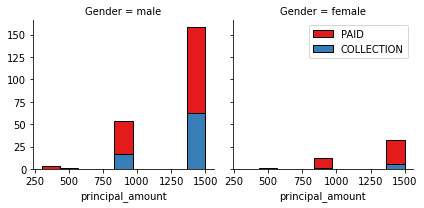

In [9]:
import seaborn as sns

bins = np.linspace(df.principal_amount.min(), df.principal_amount.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'principal_amount', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

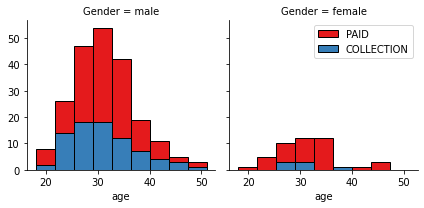

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

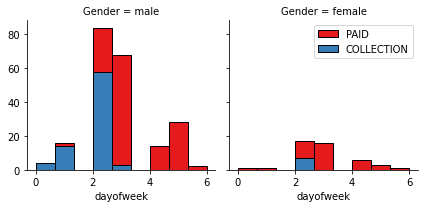

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAID,1500,30,2019-09-08,2019-10-07,47,Secondary or Below,male,6,1
1,2,2,PAID,1500,30,2019-09-08,2019-10-07,33,Bachelors,female,6,1
2,3,3,PAID,1500,15,2019-09-08,2019-09-22,27,college,male,6,1
3,4,4,PAID,1500,30,2019-09-09,2019-10-08,28,college,female,0,0
4,6,6,PAID,1500,30,2019-09-09,2019-10-08,29,college,male,0,0


In [13]:
df.groupby(['Gender'])['status'].value_counts(normalize=True)

Gender  status    
female  PAID          0.865385
        COLLECTION    0.134615
male    PAID          0.731293
        COLLECTION    0.268707
Name: status, dtype: float64

In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,user_id,un_named,status,principal_amount,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAID,1500,30,2019-09-08,2019-10-07,47,Secondary or Below,0,6,1
1,2,2,PAID,1500,30,2019-09-08,2019-10-07,33,Bachelors,1,6,1
2,3,3,PAID,1500,15,2019-09-08,2019-09-22,27,college,0,6,1
3,4,4,PAID,1500,30,2019-09-09,2019-10-08,28,college,1,0,0
4,6,6,PAID,1500,30,2019-09-09,2019-10-08,29,college,0,0,0


In [16]:
df.groupby(['education'])['status'].value_counts(normalize=True)

education           status    
Bachelors           PAID          0.750000
                    COLLECTION    0.250000
Master or Above     COLLECTION    0.500000
                    PAID          0.500000
Secondary or Below  PAID          0.741722
                    COLLECTION    0.258278
college             PAID          0.765101
                    COLLECTION    0.234899
Name: status, dtype: float64

In [17]:
Feature = df[['principal_amount','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'],
axis = 1,inplace=True)
Feature.head()

,principal_amount,terms,age,Gender,weekend,Bachelors,Secondary or Below,college
0,1500,30,47,0,1,0,1,0
1,1500,30,33,1,1,1,0,0
2,1500,15,27,0,1,0,0,1
3,1500,30,28,1,0,0,0,1
4,1500,30,29,0,0,0,0,1


In [18]:
X = Feature
X[0:5]

,principal_amount,terms,age,Gender,weekend,Bachelors,Secondary or Below,college
0,1500,30,47,0,1,0,1,0
1,1500,30,33,1,1,1,0,0
2,1500,15,27,0,1,0,0,1
3,1500,30,28,1,0,0,0,1
4,1500,30,29,0,0,0,0,1


In [19]:
y = df['status'].values
y[0:5]

array(['PAID', 'PAID', 'PAID', 'PAID', 'PAID'], dtype=object)

In [20]:
def foo():
    X= preprocessing.StandardScaler().fit(X).transform(X)
    X[0:5]
    return self.partial_fit(X,y)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [22]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

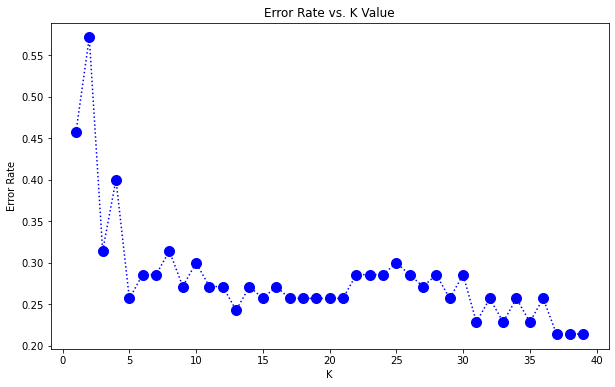

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dotted', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    print('CONFUSION_MATRIX :')
    print(confusion_matrix(pred_i,y_test))
    print('\n')
    print('REPORT :')
    print(classification_report(pred_i,y_test))

CONFUSION_MATRIX :
[[ 1  5]
 [14 50]]


REPORT :
              precision    recall  f1-score   support

  COLLECTION       0.07      0.17      0.10         6
        PAID       0.91      0.78      0.84        64

    accuracy                           0.73        70
   macro avg       0.49      0.47      0.47        70
weighted avg       0.84      0.73      0.78        70



In [30]:
print('Accuracy score  :')
metrics.accuracy_score(pred_i,y_test)

Accuracy score  :


0.7285714285714285

In [ ]:
#SVM STARTS HERE

In [31]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
y_pred

array(['PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID'], dtype=object)

In [32]:
print('CLASSIFICATION_REPORT:')
print(metrics.classification_report(y_pred,y_test))

CLASSIFICATION_REPORT:
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
        PAID       1.00      0.79      0.88        70

    accuracy                           0.79        70
   macro avg       0.50      0.39      0.44        70
weighted avg       1.00      0.79      0.88        70



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print('CONFUSION MATRIX:')
print(metrics.confusion_matrix(y_pred,y_test))

CONFUSION MATRIX:
[[ 0  0]
 [15 55]]


In [34]:
print('Accuracy score:')
print(metrics.accuracy_score(y_pred,y_test))

Accuracy score:
0.7857142857142857


In [ ]:
#dtree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
classification = dc.fit(X_train,y_train)
prediction = dc.predict(X_test)
prediction

array(['PAID', 'PAID', 'COLLECTION', 'COLLECTION', 'PAID', 'PAID',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'COLLECTION', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'COLLECTION', 'PAID', 'COLLECTION', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'COLLECTION', 'PAID', 'PAID', 'COLLECTION', 'PAID', 'PAID',
       'COLLECTION', 'PAID', 'PAID', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'COLLECTION',
       'COLLECTION', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAID',
       'PAID', 'PAID', 'PAID', 'COLLECTION'], dtype=object)

In [36]:
print('REPORT:')
print(classification_report(prediction,y_test))

REPORT:
              precision    recall  f1-score   support

  COLLECTION       0.27      0.20      0.23        20
        PAID       0.71      0.78      0.74        50

    accuracy                           0.61        70
   macro avg       0.49      0.49      0.49        70
weighted avg       0.58      0.61      0.60        70



In [37]:
print('Acccuracy score:')
metrics.accuracy_score(prediction,y_test)

Acccuracy score:


0.6142857142857143

In [38]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(fit_intercept=True)
linear.fit(X_train,y_train)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
y_pred = linear.predict(X_test)
y_pred

array(['PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID',
       'PAID', 'PAID', 'PAID', 'PAID', 'PAID', 'PAID'], dtype=object)

In [40]:
print('CLASSIFICATION_REPORT:');
print(metrics.classification_report(y_pred,y_test))

CLASSIFICATION_REPORT:
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
        PAID       1.00      0.79      0.88        70

    accuracy                           0.79        70
   macro avg       0.50      0.39      0.44        70
weighted avg       1.00      0.79      0.88        70



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print('ACCURACY_SCORE:');
print(metrics.accuracy_score(y_pred,y_test))

ACCURACY_SCORE:
0.7857142857142857


In [42]:
#testing

In [43]:
from sklearn.metrics import jaccard_score
#from sklearn.metrics import jaccard_similarity_score
#Does not work -> no solution found :(
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [44]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-10-31 18:03:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-10-31 18:03:17 (68.4 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [45]:
test_df= pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [46]:
test_df = pd.read_csv('loan_test.csv')

#Preprocessing

# convert date time
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
# evaulate weekend field
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# convert male to 0 and female to 1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# work out education level
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)

# normalize the test data
test_X = preprocessing.StandardScaler().fit(test_feature).transform(test_feature)
test_X[0:5]
# and target result
test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [47]:
#JC

In [48]:
knn_yhat = knn.predict(test_X)
jc1 = jaccard_score(test_y, knn_yhat, average = 'weighted')
# evaluate Decision Trees
dt_yhat = dc.predict(test_X)
jc2 = jaccard_score(test_y, dt_yhat, average = 'weighted')
#evaluate SVM
svm_yhat = svc.predict(test_X)
jc3 = jaccard_score(test_y, svm_yhat, average = 'weighted')
# evaluate Logistic Regression
lr_yhat = linear.predict(test_X)
jc4 = jaccard_score(test_y, lr_yhat, average = 'weighted')

list_jc = [jc1, jc2, jc3, jc4]
list_jc

[0.0, 0.0, 0.0, 0.007856341189674524]

In [49]:
#F1

In [50]:
fs1 = (f1_score(test_y, knn_yhat,average='weighted'))
# evaluate Desision Trees 
fs2 = (f1_score(test_y, dt_yhat, average='weighted'))
# evaluate SVM
fs3 = (f1_score(test_y, svm_yhat, average='weighted'))
# evaluate Logistic Regression
fs4 = (f1_score(test_y, lr_yhat, average='weighted'))

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.0, 0.0, 0.0, 0.015250544662309367]

In [51]:
#LOG

In [52]:
LR_yhat_prob = linear.predict_proba(test_X)

list_ll = ['NA', 'NA', 'NA',(log_loss(test_y, LR_yhat_prob))]
list_ll

['NA', 'NA', 'NA', 1.5770729915101311]

In [53]:
df = pd.DataFrame( list_jc,index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.000000,0.000000,NA
Decision Tree,0.000000,0.000000,NA
SVM,0.000000,0.000000,NA
Logistic Regression,0.007856,0.015251,1.57707
